# Д/З 2

# Регрессия

## Студеникина Мария Александровна

Аппроксимация функции f: R->R
- Размер выборки: 63 пары.
- Метод решения
1. Предобработка: выполнить нормализацию данных (привести к нулевому среднему и единичному ско), провести анализ распределения данных (опционально);
2. Построить персептрон;
3. Функция потерь: MSE;
4. Разделить данные случайным образом на обучающую и валидационную 70:30.
5. Провести анализ динамики обучения по графикам функции потерь;
6. Оценить качество сети используя многократную кросс-валидацию.

In [1]:
# Импорт библиотек
import numpy as np
import pandas as pd
import torch
from matplotlib import pyplot as plt
import torch.nn as nn
from numpy import float32
from sklearn.model_selection import train_test_split

/Users/manya/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Подключаем библиотеку, чтобы убрать варнинги и сделать чище выводы
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Загружаем данные из файла
data = pd.read_csv("dataset_regression.csv", dtype = np.float32, sep = ';', names = ['A', 'B'])
# Пример данных
data

,A,B
0,108.0,392.500000
1,19.0,46.200001
2,13.0,15.700000
3,124.0,422.200012
4,40.0,119.400002
...,...,...
58,9.0,87.400002
59,31.0,209.800003
60,14.0,95.500000
61,53.0,244.600006


In [4]:
data_1 = data.copy()
data_1_2 = torch.tensor(data_1.values)
x_1, y_2 = data_1_2[:, 0], data_1_2[:, 1]

In [5]:
data_2 = data.copy()
data_3 = torch.tensor(data_2.values)
data_norm = data_3
torch.nn.functional.normalize(data_3, p = 1.1, dim = 1, eps = 1e-12, out = data_norm)
x, y = data_norm[:, 0], data_norm[:, 1]

Функция torch.nn.functional.normalize применяется к data_3 для нормализации данных. Здесь p равно 1.1, dim указывает размерность, по которой будет производиться нормализация (в данном случае по 1-й размерности), eps - это очень малое положительное число, добавленное для избежания деления на ноль, и out указывает, что нормализованные данные будут сохранены в data_norm.
5. В конце кода значение первого столбца data_norm присваивается переменной x, а значение второго столбца data_norm присваивается переменной y.

Таким образом, исходные данные из data_2 преобразуются в тензоры PyTorch (data_3), нормализуются по заданной размерности и сохраняются нормализованные значения в data_norm. Затем переменные x и y получают значения первого и второго столбца data_norm соответственно.

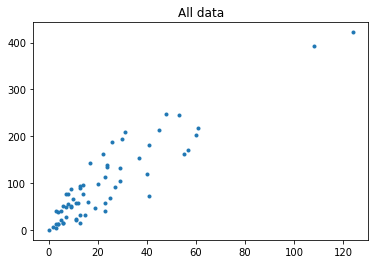

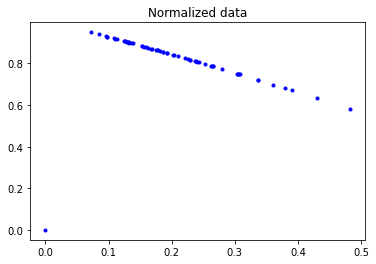

In [6]:
plt.figure("All data")
plt.title("All data")
plt.plot(x_1,y_2,marker=".",lw=0)

plt.figure("Normalized data")
plt.title("Normalized data")
plt.plot(x, y, "b", marker = ".", lw = 0)
plt.show()

In [7]:
# Разделение на выборки
X_train, X_val, y_train, y_val = train_test_split(x, y, train_size=0.7, random_state=42)

In [68]:
# Построение персептрона
class MLP(nn.Module):
    def __init__(self, size):
        super(MLP, self).__init__()
        self.mlp1 = nn.Linear(1, size)
        #self.mlp2 = nn.Linear(size, size)
        #self.mlp3 = nn.Linear(size, size)
        #self.mlp4 = nn.Linear(size, size)
        #self.mlp5 = nn.Linear(size, size)
        #self.mlp6 = nn.Linear(size, size)
        #self.mlp7 = nn.Linear(size, size)
        self.mlp8 = nn.Linear(size, 1)
    
    def forward(self, x):
        x = self.mlp1(x)
        #x = nn.ReLU()(x)
        #x = self.mlp2(x)
        #x = nn.ReLU()(x)
        #x = self.mlp3(x)
        #x = nn.ReLU()(x)
        #x = self.mlp4(x)
        #x = nn.ReLU()(x)
        #x = self.mlp5(x)
        #x = nn.ReLU()(x)
        #x = self.mlp6(x)
        #x = nn.ReLU()(x)
        #x = self.mlp7(x)
        x = nn.ReLU()(x)
        x = self.mlp8(x)
        return x

In [64]:
def funk(s_2, s_3):
    
    mlp = MLP(s_2)
    
    optimazer = torch.optim.SGD(mlp.parameters(), lr = 0.01)
    
    # Объединение в массив для дальнейшего перемешивания данных для улучшения точности обучения
    X_y_train = (torch.cat((X_train.reshape(1, 44), y_train.reshape(1, 44)), 0)).T
    
    # создание списков для записи переменных для построения графиков
    num_epoch = []
    Err_train = []
    Err_val = []

    loss = nn.MSELoss()
    
    # задание количества эпох
    max_epoches = s_3

    for epoch in np.arange(max_epoches):
        
        # перемешиваем данные каждую эпоху для лучшей точности
        X_y_train_mix = X_y_train[torch.randperm(X_y_train.size()[0])]

        # разделяем на x и y
        x_2 = X_y_train_mix[:,:-1]
        y_2 = X_y_train_mix[:,-1:]

        # прогнозируем следующие значения
        y_prog = mlp(x_2)
        
        # считаем ошибку и добавляем полученное значение в список
        loss_1 = loss(y_prog, y_2)
        Err_train.append(loss_1.item())
        
        optimazer.zero_grad()
        loss_1.backward()
        optimazer.step()

        #if (epoch % s_4 == 0):
        y_val_2 = mlp((X_val.reshape(1, -1)).T)
        loss_val = loss(y_val_2, y_val)
        num_epoch.append(epoch)
        Err_val.append(loss_val .item())
        
        # вычисления процента обучения выборки
        #current = 0
        #for i in np.arange(X_val.size()[0]):
        #    if(abs(y_val[i] - torch.round(y_val_2[i])) < 10 ** (-9)):
        #        current += 1
        #accuracy = current/X_val.size()[0]
        #print('Epoch № {}:  Error = {},  Accuracy = {}'.format(epoch, loss_val, accuracy))
    
    #iter = np.arange(max_epoches)
    #fig, axs = plt.subplots(1, 2, figsize = (16, 6))
    #plt.rcParamscf.updater({'font.size':23})
    #axs[0].plot(iter, Err_train)
    #axs[0].set(xlabel = 'Номер итерации', ylabel = 'Ошибка тестовой выборки')
    #axs[1].plot(num_epoch, Err_val)
    #axs[1].set(xlabel = 'Номер эпохи', ylabel = 'Ошибка валидационной выборки')
    #fig.tight_layout()

    # график 
    iter = np.arange(max_epoches)
    plt.plot(iter, Err_train, label = 'Ошибка тестовой выборки')
    plt.plot(iter, Err_val, label = 'Ошибка валидационной выборки')
    plt.xlabel('Количество эпох')
    plt.ylabel('Потери при обучении')
    plt.legend()
    plt.show

### Модель 1
Однослойный персептрон

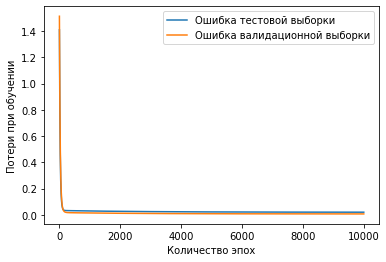

In [52]:
z = funk(1, 10000)

### Модель 2
Двухслойный персептрон

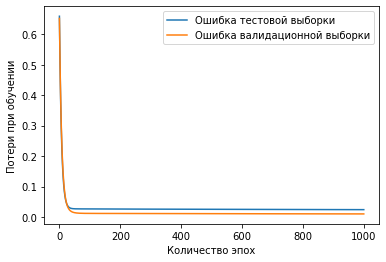

In [69]:
# применяем функцияю и задаем количетво нейтронов в слоях количество эпох и с какой частотой их выводить
z = funk(8, 1000)

## Модель 3
Четырехслойный персептрон

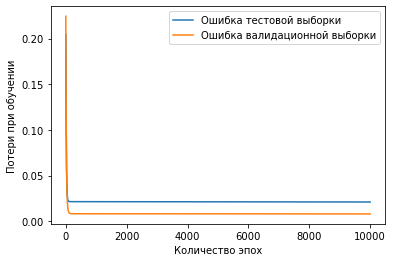

In [67]:
z = funk(8, 10000)

## Модель 4
Восьмислойный персептрон

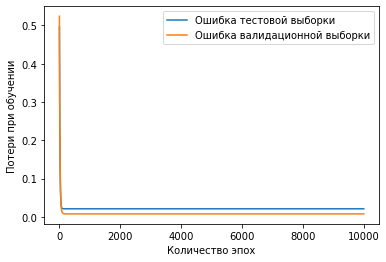

In [65]:
z = funk(8, 10000)

В задаче на выборке размера 63 пары нужно было оценить качество аппроксимирующей функции по отношению к исходной в зависимости от используемой модели. 

Перед началом работы проводится нормализация данных. Нормализация данных нужна для того, чтобы привести данные к определенному диапазону значений. Это может улучшить производительность моделей. Нормализация была выполнена с помощью функции torch.nn. functional.normalize. Кроме того, данные были разделены на обучающую и валидационную в соотношении 70:30. 

Первый вариант модели — это однослойный персептрон. Это простейшая модель нейронной сети, которая состоит из одного входного слоя, одного выходного слоя и одного скрытого слоя. Этот тип нейронной сети используется для решения задач классификации и регрессии. Однослойный персептрон может быть использован для аппроксимации функций, распознавания образов и других задач. Функция потерь рассчитывается с помощью среднеквадратичной ошибки (MSE), это одна из самых простых и распространенных функций, которую можно использовать в машинном обучении. 
Количество эпох 10000, а НС состоит из одного персептрона. 
Как видно из графиков ошибок на обучающей и валидационной выборках, ошибка резко уменьшается и далее стремиться к некоторому постоянному значению, что было ожидаемо. 

Вторая используемая модель — это двухслойный персептрон. Он представляет собой нейронную сеть, состоящую из входного, выходного и двух скрытых слоев нейронов. Двухслойный персептрон используется для решения более сложных задач, чем однослойный персептрон, и позволяет моделировать более сложные зависимости между входными и выходными данными. Функция ReLU (Rectified Linear Unit) используется для активации нейронов. Это кусочно-линейная функция, которая пропускает положительные значения и обрезает отрицательные. Это позволяет улучшить скорость обучения модели и предотвратить затухание градиента. Можно заметить, что потреи при обучении становятся меньше, чем в первой модели.

Третья модель — четырехслойный персептрон. Это еще более сложная модель, чем вторая, это нейронная сеть с четырьмя слоями нейронов: входным, выходным и тремя скрытыми слоями. Для активации используется также функция ReLU. Из графика видно, что потери понизились посравнению с первой и второй моделями.

Последняя используемая модель — это восьмислойный персептрон. Это самая сложная модель, используемая в работе. Она состоит из восьми слоев нейронов: входным, выходным и семью скрытыми слоями. В качестве функции активации используется функция ReLU. Как из графика можно заметить, ошибка увеличилась посравнению с третьей моделью. Если в персептроне слищком много слоев, это может привести к переобучению НС, что вызывает увеличение ошибки.

В заключении стоит отметить, что в ходе работы была построена нейронная сеть, с помощью которой можно апроксимизировать набор точек с определенной точностью. Количество слоев и структура персептрона зависит от конкретной задачи и от размера выборки. Не существует универсального рецепта для выбора наилучшей структуры НС. Эксперименты в этой работе показали, что для данной задачи и на данной выборке из протестированных моделей лучше всего себя показала третья модель, четырехслойный персептрон.